###### Start by importing all necessary packages

In [4]:
import warnings
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.formula.api import logit
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from pandas.core.common import SettingWithCopyWarning
import sklearn 
 
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

###### Read the loans.csv file into a pandas dataframe called "df"

In [5]:
# Read the file loan.csv into a Pandas dataframe object, df. 
# YOUR CODE HERE
#raise NotImplementedError()
df = pd.read_csv('loans.csv')
df.head(6)

,default,installment,log_income,fico_score,rev_balance,inquiries,records
0,0,829,4.93,737,28.85,0,0
1,0,228,4.81,707,33.62,0,0
2,0,367,4.51,682,3.51,1,0
3,0,162,4.93,712,33.67,1,0
4,0,103,4.91,667,4.74,0,0
5,0,125,5.17,727,50.81,0,0


###### Extract the two columns you will be focusing on "default" and "fico_score" 

In [7]:
#Extract everything besided "default" and "fico_score" from the dataframe
# YOUR CODE HERE
#raise NotImplementedError()
df = df[['default', 'fico_score']]

###### Examine the data

In [8]:
df.head(6)

,default,fico_score
0,0,737
1,0,707
2,0,682
3,0,712
4,0,667
5,0,727


In [9]:
df.tail(6)

,default,fico_score
9510,1,662
9511,1,672
9512,1,722
9513,1,687
9514,1,692
9515,1,732


###### use df.loc[] to grab all the columns where default = 1/ there was a default. Assign this to "default_df"

In [10]:
# Use df.loc[] to extract all rows where a loan defaulted.
# Set the resulting dataset to default_df to be displayed
# YOUR CODE HERE
#raise NotImplementedError()
default_df = df.loc[df['default']==1]
 
print('\nResult dataframe :\n', default_df)


Result dataframe :
       default  fico_score
6           1         667
7           1         722
57          1         682
65          1         687
73          1         677
...       ...         ...
9511        1         672
9512        1         722
9513        1         687
9514        1         692
9515        1         732

[1521 rows x 2 columns]


###### Use df.loc[] to grab all rows where a loan did not default and assign the output to no_default_df. 

In [11]:
#Use df.loc[] to extract all rows where a loan did not default.
# Set the resulting dataset to no_default_df to be displayed
# YOUR CODE HERE
#raise NotImplementedError()
no_default_df = df.loc[df['default']!=1]

print('\nResult dataframe :\n', no_default_df)


Result dataframe :
       default  fico_score
0           0         737
1           0         707
2           0         682
3           0         712
4           0         667
...       ...         ...
9499        0         722
9500        0         717
9502        0         687
9505        0         687
9506        0         667

[7995 rows x 2 columns]


###### Examine the resulting dataframes 

In [12]:
no_default_df.describe()

,default,fico_score
count,7995.0,7995.000000
mean,0.0,713.307067
std,0.0,38.209948
min,0.0,612.000000
25%,0.0,682.000000
50%,0.0,707.000000
75%,0.0,742.000000
max,0.0,827.000000


In [13]:
default_df.describe()

,default,fico_score
count,1521.0,1521.000000
mean,1.0,697.884287
std,0.0,33.764233
min,1.0,617.000000
25%,1.0,672.000000
50%,1.0,692.000000
75%,1.0,717.000000
max,1.0,822.000000


###### Fill in the code to display a scatter plot of fico_score vs defaults. Set alpha =0.1 and s=200

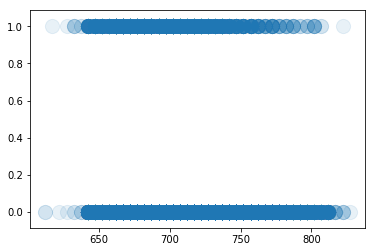

In [14]:
# YOUR CODE HERE
#raise NotImplementedError()
# Create the scatter plot with specified alpha and s values
plot = plt.scatter(df['fico_score'], df['default'], alpha=0.1, s=200)
points = plot.get_offsets()
# Add labels for clarity
#plt.xlabel("FICO Score")
#plt.ylabel("Defaults")

# Display the plot
#plt.show()


###### Split the dataframe inot train and test sets called df_train and df_test

In [16]:
# Data split into 70% train and 30% test. 
# The dataframes should be called df_train and df_test
# YOUR CODE HERE
#raise NotImplementedError()
#df = pd.read_csv('loans.csv')

df_train, df_test = train_test_split(df, test_size=0.3)

###### Examine the training set

In [17]:
df_train.describe()

,default,fico_score
count,6661.000000,6661.000000
mean,0.163339,710.866537
std,0.369702,37.898518
min,0.000000,612.000000
25%,0.000000,682.000000
50%,0.000000,707.000000
75%,0.000000,737.000000
max,1.000000,827.000000


###### Create a formula and your modle based on training data

In [19]:
# build formula,  target (depedent variable) ~ features (indepedent variables)
# build model, fit the formula to the training data using a logistic algorithim (logit). 
# Set the output to "est"
# YOUR CODE HERE
# build formula,  target (depedent variable) ~ features (indepedent variables)
#installment	log_income	fico_score	rev_balance	inquiries	records

formula="default ~ fico_score"
# build model, fit the formula to the training data using a logistic algorithim (logit)
est = logit(formula=formula, data=df_train).fit()
#raise NotImplementedError()

# print the results of the model (est).
# Examine; Pseudo R-squared, p values, coefficients 
print(est.summary())

Optimization terminated successfully.
         Current function value: 0.432599
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 6661
Model:                          Logit   Df Residuals:                     6659
Method:                           MLE   Df Model:                            1
Date:                Mon, 15 Jan 2024   Pseudo R-squ.:                 0.02823
Time:                        20:33:28   Log-Likelihood:                -2881.5
converged:                       True   LL-Null:                       -2965.2
Covariance Type:            nonrobust   LLR p-value:                 2.720e-38
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9284      0.689     10.062      0.000       5.579       8.278
fico_score    -0.0121      0.

###### Use your model to make predictions based on the test set

In [20]:
# Use your model to create a predicted probability of default from the df_test dataframe 
# Assign a new calumn "predicted_probability" to the predicted output
# YOUR CODE HERE
#raise NotImplementedError()
preds = est.predict(df_test)
df_test['predicted_probability'] = preds
df_test.head(6)


,default,fico_score,predicted_probability
3582,0,692,0.186500
7447,0,792,0.063746
9442,1,697,0.177465
1490,0,737,0.117197
938,0,662,0.248115
954,0,682,0.205624


###### Next, create a new column called "will default" that observes the predicted probability and flags a loan as a potential to default or not. Experiment with the predicted probability threshold to optimise the model. 

In [22]:
# Create a new column called "will_default". Play around with the predicted probability threshold. 
# A good starting threshold for a 1 flag is 25%
#If yes assign will_default to 1, otherwise to 0
# YOUR CODE HERE
#raise NotImplementedError()
df_test['will_default'] = np.where(df_test['predicted_probability']>0.25, 1, 0)
df_test.head(6)
print(df_test)

      default  fico_score  predicted_probability  will_default
3582        0         692               0.186500             0
7447        0         792               0.063746             0
9442        1         697               0.177465             0
1490        0         737               0.117197             0
938         0         662               0.248115             0
...       ...         ...                    ...           ...
5156        0         692               0.186500             0
1863        1         727               0.130354             0
401         1         722               0.137391             0
5559        0         712               0.152422             0
419         0         797               0.060218             0

[2855 rows x 4 columns]


###### Create a confusion matrix so you can observe your model's performance on the test data. It should be examining predicted vs actual default values (will_default vs default). 

In [24]:
# Create a confusion matrix displaying actual vs predicted values. 
# Assign the output to "matrix"
# YOUR CODE HERE
#raise NotImplementedError()
# Assuming df_test['default'] is the true labels and df_test['will_default'] is the predicted labels
true_labels = df_test['default']
predicted_labels = df_test['will_default']
# Compute confusion matrix
matrix = confusion_matrix(true_labels, predicted_labels)
# Display confusion matrix
#matrix = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Default', 'Default'])
#matrix.plot()
# Display confusion matrix
#ConfusionMatrixDisplay.from_predictions(df_test['default'], df_test['will_default'], display_labels=['No Default', 'Default'])
# print accuracy
#print('Accuracy:', accuracy_score(df_test['default'], df_test['will_default']))
#print('Accuracy:'+str(accuracy_score(df_test['default'], df_test['will_default'])))

###### Execute the follwoing cells to view a heatmap of the confusion matrix and accuracy of your model. Use these to answer the follow-up questions for the assignment.

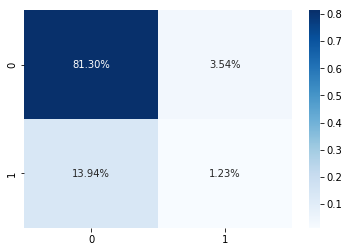

In [25]:
sns.heatmap(matrix/np.sum(matrix), annot=True, 
            fmt='.2%', cmap='Blues')

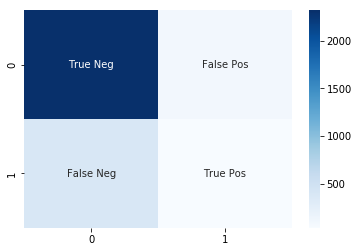

In [26]:
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt="", cmap='Blues')

###### Finally, observe the accuracy of the model. 

In [27]:

print('Accuracy:'+str(accuracy_score(df_test['default'], df_test['will_default'])))

Accuracy:0.8252189141856392
